# 1. Import and Install Dependencies

In [1]:
!pip install opencv-python

In [2]:
!pip install mediapipe

In [3]:
!pip install scikit-learn


In [4]:
import os
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

**Determine the dataset path**

In [5]:
dataset = 'D:\gym\CV'
model_save_path = 'The saved model/model.keras'


**Determine the number of classes**

In [6]:
NUM_CLASSES = 16

# 2. Load Dataset

In [7]:
def load_dataset(dataset_path):
    x = []
    y = []
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # Loop through dataset directory
    for exercise_folder in os.listdir(dataset_path):
        exercise_label = exercise_folder
        exercise_folder_path = os.path.join(dataset_path, exercise_folder)  #/content/Data1/crunches

        # Loop through video files in exercise folder
        for video_file in os.listdir(exercise_folder_path):
            video_path = os.path.join(exercise_folder_path, video_file)
            cap = cv2.VideoCapture(video_path)
            while cap.isOpened():
                success, image = cap.read()
                if not success:
                    break
                # Process image using MediaPipe Pose Detection
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                result = pose.process(image_rgb)
                if result.pose_landmarks:
                    # Extract pose landmarks
                    landmarks = [[lm.x, lm.y] for lm in result.pose_landmarks.landmark]
                    x.append(landmarks)
                    y.append(exercise_label)
            cap.release()
    return np.array(x), np.array(y)

**Call the load data function**

In [8]:
x, y = load_dataset(dataset)


In [9]:
print(f"Type of X: {type(x)}")
print(f"Type of y: {type(y)}")

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [10]:
m = 0
for i in y:
  if (i == 'Bench Press False'):
    m+=1
print(m)

2149


In [11]:
print(y)

['Bench Press False' 'Bench Press False' 'Bench Press False' ...
 'T Bar Row True' 'T Bar Row True' 'T Bar Row True']


# 3. Change The Label's Names

In [12]:
for i in range(y.size):
  if y[i] == 'Bench Press False':
    y[i] = 0
  elif y[i] == 'Bench Press True':
    y[i] = 1
  elif y[i] == 'Chest Fly Machine False':
    y[i] = 2
  elif y[i] == 'Chest Fly Machine True':
    y[i] = 3
  elif y[i] == 'Hammer Curl False':
    y[i] = 4
  elif y[i] == 'Hammer Curl True':
    y[i] = 5
  elif y[i] == 'Hip Thrust False':
    y[i] = 6
  elif y[i] == 'Hip Thrust True':
    y[i] = 7
  elif y[i] == 'Lat Pulldown False':
    y[i] = 8
  elif y[i] == 'Lat Pulldown True':
    y[i] = 9
  elif y[i] == 'Leg Extension False':
    y[i] = 10
  elif y[i] == 'Leg Extension True':
    y[i] = 11
  elif y[i] == 'Pull Up False':
    y[i] = 12
  elif y[i] == 'Pull Up True':
    y[i] = 13
  elif y[i] == 'T Bar Row False':
    y[i] = 14
  elif y[i] == 'T Bar Row True':
    y[i] = 15
  else:
    y[i] = -1

In [13]:
print(y)

['0' '0' '0' ... '15' '15' '15']


**Making sure that the x and y is np.float32**

In [14]:
if x.dtype != np.float32:
    x = x.astype(np.float32)
if y.dtype != np.float32:
    y = y.astype(np.float32)

**Split the dataset into train data and test data**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Traning Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [17]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)


In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    callbacks=[cp_callback]
    )


Epoch 1/500
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6992 - loss: 0.9117
Epoch 1: saving model to The saved model/model.keras
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6993 - loss: 0.9115 - val_accuracy: 0.9811 - val_loss: 0.0669
Epoch 2/500
2115/2122 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9735 - loss: 0.0937
Epoch 2: saving model to The saved model/model.keras
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9735 - loss: 0.0937 - val_accuracy: 0.9837 - val_loss: 0.0502
Epoch 3/500
2117/2122 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9847 - loss: 0.0553
Epoch 3: saving model to The saved model/model.keras
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9847 - loss: 0.0553 - val_accuracy: 0.9920 - val_loss: 0.0270
Epoch 4/500
2119/2122 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9882 - loss: 0.0425
Epoch 4: saving model to The saved model/model.keras
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9882 - loss: 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 31, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 13, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        51,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 903,626 (3.45 MB)

 Trainable params: 301,208 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 602,418 (2.30 MB)

# 5. Evaluation Using Accuracy

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9950 - loss: 0.2298


In [45]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('LOSS: ', loss_test)
print("ACCURACY: ", accuracy_test)

1327/1327 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.2298
LOSS:  0.3148127496242523
ACCURACY:  0.9946505427360535


In [22]:
model = tf.keras.models.load_model(model_save_path)


In [23]:
print(model.input_shape)

(None, 33, 2)


# 6. Evaluation Using Confusion Matrix ,Accuracy and Loss

1327/1327 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Misclassified Instances: [   31   833   854   968   984  1190  1225  1598  1751  1772  2100  2240
  2337  2690  2747  2966  3155  3291  3968  4109  4313  4319  4823  5238
  5405  5475  5625  6273  6386  6588  6777  7252  7651  8057  8322  8339
  8407  8810  9082  9273  9327  9647  9855 10003 10584 10621 10652 10747
 10856 10860 10930 11056 11269 11628 11646 12159 12386 12429 12437 13016
 13408 13640 13673 13731 13907 14007 14348 14449 14635 14745 14898 15185
 15235 15397 16100 16230 16336 16466 16689 16730 16991 17351 17354 17450
 17593 18710 18802 18967 18996 19136 19343 19491 19512 19574 19654 19707
 19952 20076 20819 20925 21100 21150 21424 21609 21647 21794 21874 21931
 22075 22275 22486 22578 22609 22646 22787 22933 22979 23213 23234 23251
 23303 23457 23506 23685 23719 23886 24000 24009 24110 24454 24595 24842
 25311 25347 25472 25690 25907 26012 26522 26567 26592 26675 26756 26804
 26809 26823 27292 27675 27839 28225 28371 28655 28675 2

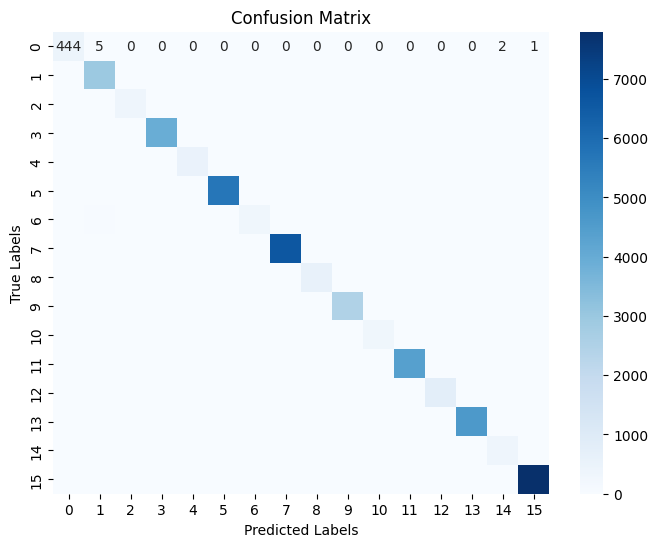

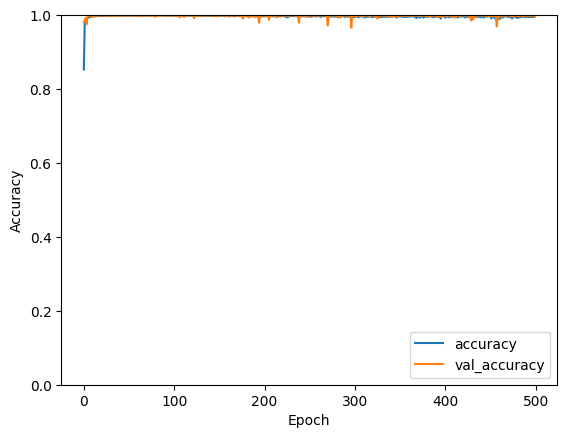

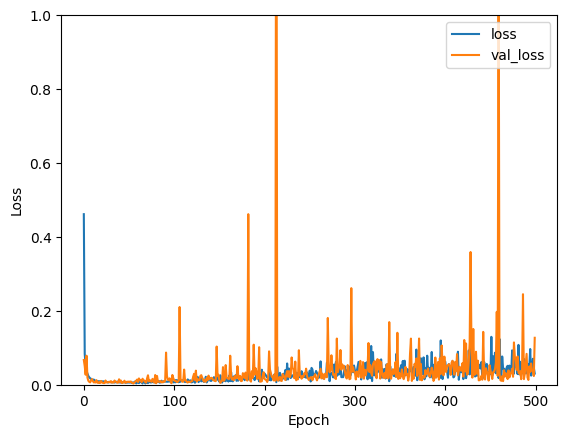

In [43]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Predict labels for test data 
y_pred = np.argmax(model.predict(X_test), axis=1) 
# Error Analysis 
misclassifications = np.where(y_test != y_pred)[0] 
print("Misclassified Instances:", misclassifications) 

# Result Analysis 
accuracy = np.mean(y_test == y_pred) 
print("Accuracy:", accuracy) 
print(classification_report(y_test, y_pred)) 

# Confusion Matrix 
conf_mat = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show() 

# Visualization for Test and Train (Learning curves) 
plt.plot(history.history['accuracy'], label='accuracy') 
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.ylim([0, 1]) 
plt.legend(loc='lower right') 
plt.show() 

plt.plot(history.history['loss'], label='loss') 
plt.plot(history.history['val_loss'], label = 'val_loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.ylim([0, 1]) 
plt.legend(loc='upper right') 
plt.show()

# 7. Testing In Real Time

In [24]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [54]:
import cv2
import mediapipe as mp
import numpy as np

# Define the video path
video_path = "d:\\gym\Check Data\\Bench Press True\\bench press_13.mp4"
# video_path = 'd:\\PathGYm\\Check Data\\Chest Fly Machine True\\chest fly machine_13.mp4'

# Load the trained model
# Replace this with your model loading code
# model = load_model()

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Initialize MediaPipe Pose Detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process frame with MediaPipe Pose Detection
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)

    # Check if pose landmarks are detected
    if result.pose_landmarks:
        # Extract pose landmarks
        landmarks = [[lm.x, lm.y] for lm in result.pose_landmarks.landmark]

        # Preprocess landmarks (reshape, convert to numpy array, etc.)
        # Example:
        landmarks_array = np.array(landmarks, dtype=np.float32)
        
        # Ensure landmarks_array has 33 landmarks
        num_landmarks = landmarks_array.shape[0]
        if num_landmarks < 33:
            # Pad with zeros to have 33 landmarks
            landmarks_array = np.pad(landmarks_array, ((0, 33 - num_landmarks), (0, 0)), mode='constant', constant_values=0)
        elif num_landmarks > 33:
            # Truncate to have 33 landmarks
            landmarks_array = landmarks_array[:33, :]
        
        landmarks_array = landmarks_array[np.newaxis, :, :]  # Add batch dimension

        # Set a threshold confidence level for model predictions
        confidence_threshold = 0.999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999  # A very high value

        # Use the model to make predictions
        predictions = model.predict(landmarks_array)

        # Check if the maximum confidence score is above the threshold
        max_confidence = np.max(predictions)
        if max_confidence >= confidence_threshold:
            # Get the index of the predicted class
            predicted_class_index = np.argmax(predictions)
     
            # Map the predicted class index to the exercise name
            if predicted_class_index == 0:
                predicted_class_name = "Bench Press False"
            elif predicted_class_index == 1:
                predicted_class_name = "Bench Press True"
            elif predicted_class_index == 2:
                predicted_class_name = "Chest Fly Machine False"
            elif predicted_class_index == 3:
                predicted_class_name = "Chest Fly Machine True"
            elif predicted_class_index == 4:
                predicted_class_name = "Hammer Curl False"
            elif predicted_class_index == 5:
                predicted_class_name = "Hammer Curl True"
            elif predicted_class_index == 6:
                predicted_class_name = "Hip Thrust False"
            elif predicted_class_index == 7:
                predicted_class_name = "Hip Thrust True"
            elif predicted_class_index == 8:
                predicted_class_name = "Lat Pulldown False"
            elif predicted_class_index == 9:
                predicted_class_name = "Lat Pulldown True"
            elif predicted_class_index == 10:
                predicted_class_name = "Leg Extension False"
            elif predicted_class_index == 11:
                predicted_class_name = "Leg Extension True"
            elif predicted_class_index == 12:
                predicted_class_name = "Pull Up False"
            elif predicted_class_index == 13:
                predicted_class_name = "Pull Up True"
            elif predicted_class_index == 14:
                predicted_class_name = "T Bar Row False"
            elif predicted_class_index == 15:
                predicted_class_name = "T Bar Row True"    
        else:
            # If confidence is below threshold, return "Try Again"
            predicted_class_name = "Try Again"

        # Draw the predicted class name on the frame
        cv2.putText(frame, predicted_class_name, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow("output", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━